<center><h1>Project: Implementing Python and Webscraping To Compare Revenues of Stocks</h1></center>

<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. Here, I will extract some stock data, and will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract Tesla Revenue Data</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract GME Revenue Data</li>
        <li>Plotting Tesla Stock Graph</li>
        <li>Plotting GameStop Stock Graph</li>
    </ul>
</div>

<hr>


In [3]:
!pip install yfinance==0.1.67
# !pip install pandas==1.3.3
# !pip install requests==2.26.0
!pip install bs4
# !pip install plotly==5.3.1

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=e9075121230ac4438b1b89debc330b54710a164146624c821b12cdb22a89018d
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=ae44115efacc1f549f9fe109a2272c31d4d0b052d73758eb7b892417c52d9de0
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!pip install bs4 
!pip install html5lib
!pip install lxml==4.6.4
#!pip install plotly==5.3.1
import pandas as pd
import requests
from bs4 import BeautifulSoup

     |████████████████████████████████| 6.9 MB 970 kB/s eta 0:00:011      | 1.8 MB 16.2 MB/s eta 0:00:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.7.1
    Uninstalling lxml-4.7.1:
      Successfully uninstalled lxml-4.7.1


## Defining a Graphing Function


Here, we define the function `make_graph`. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data


Using the `Ticker` function we enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` we extract stock information and save it in a dataframe named `tesla_data`. Setting the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")

**Resetting the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and displaying the first five rows of the `tesla_data` dataframe using the `head` function.


In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Using Webscraping to Extract Tesla Revenue Data


Using the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01).


In [18]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text

Parsing the html data using `beautiful_soup`.


In [19]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function to extract the table with `Tesla Quarterly Revenue` and storing it into a dataframe named `tesla_revenue`.


In [20]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)


Executing the following to remove the comma and dollar sign from the `Revenue` column.


In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/tmp/wsuser/ipykernel_164/349343550.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Executing the following to remove an null or empty strings in the Revenue column.


In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [23]:
tesla_revenue.tail()

,Date,Revenue
46,2010-09-30,31
47,2010-06-30,28
48,2010-03-31,21
50,2009-09-30,46
51,2009-06-30,27


## Using yfinance to Extract Stock Data


Using the `Ticker` function we extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [24]:
GameStop = yf.Ticker("GME")

In [25]:
gme_data = GameStop.history(period="max")

In [26]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


## Using Webscraping to Extract GME Revenue Data


Using the `requests` library to download the webpage <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html>.


In [27]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

data = requests.get(url).text

Parsinig the html data using `beautiful_soup`.


In [28]:
soup = BeautifulSoup(data, "html5lib")

Using `BeautifulSoup` or the `read_html` function extracting the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Making sure the comma and dollar sign is removed from the `Revenue` column using a similiar method.


In [29]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',',"").replace('$',"")
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
            

In [30]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Plotting Tesla Stock Graph


Using the `make_graph` function to graph the Tesla Stock Data. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.


In [31]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

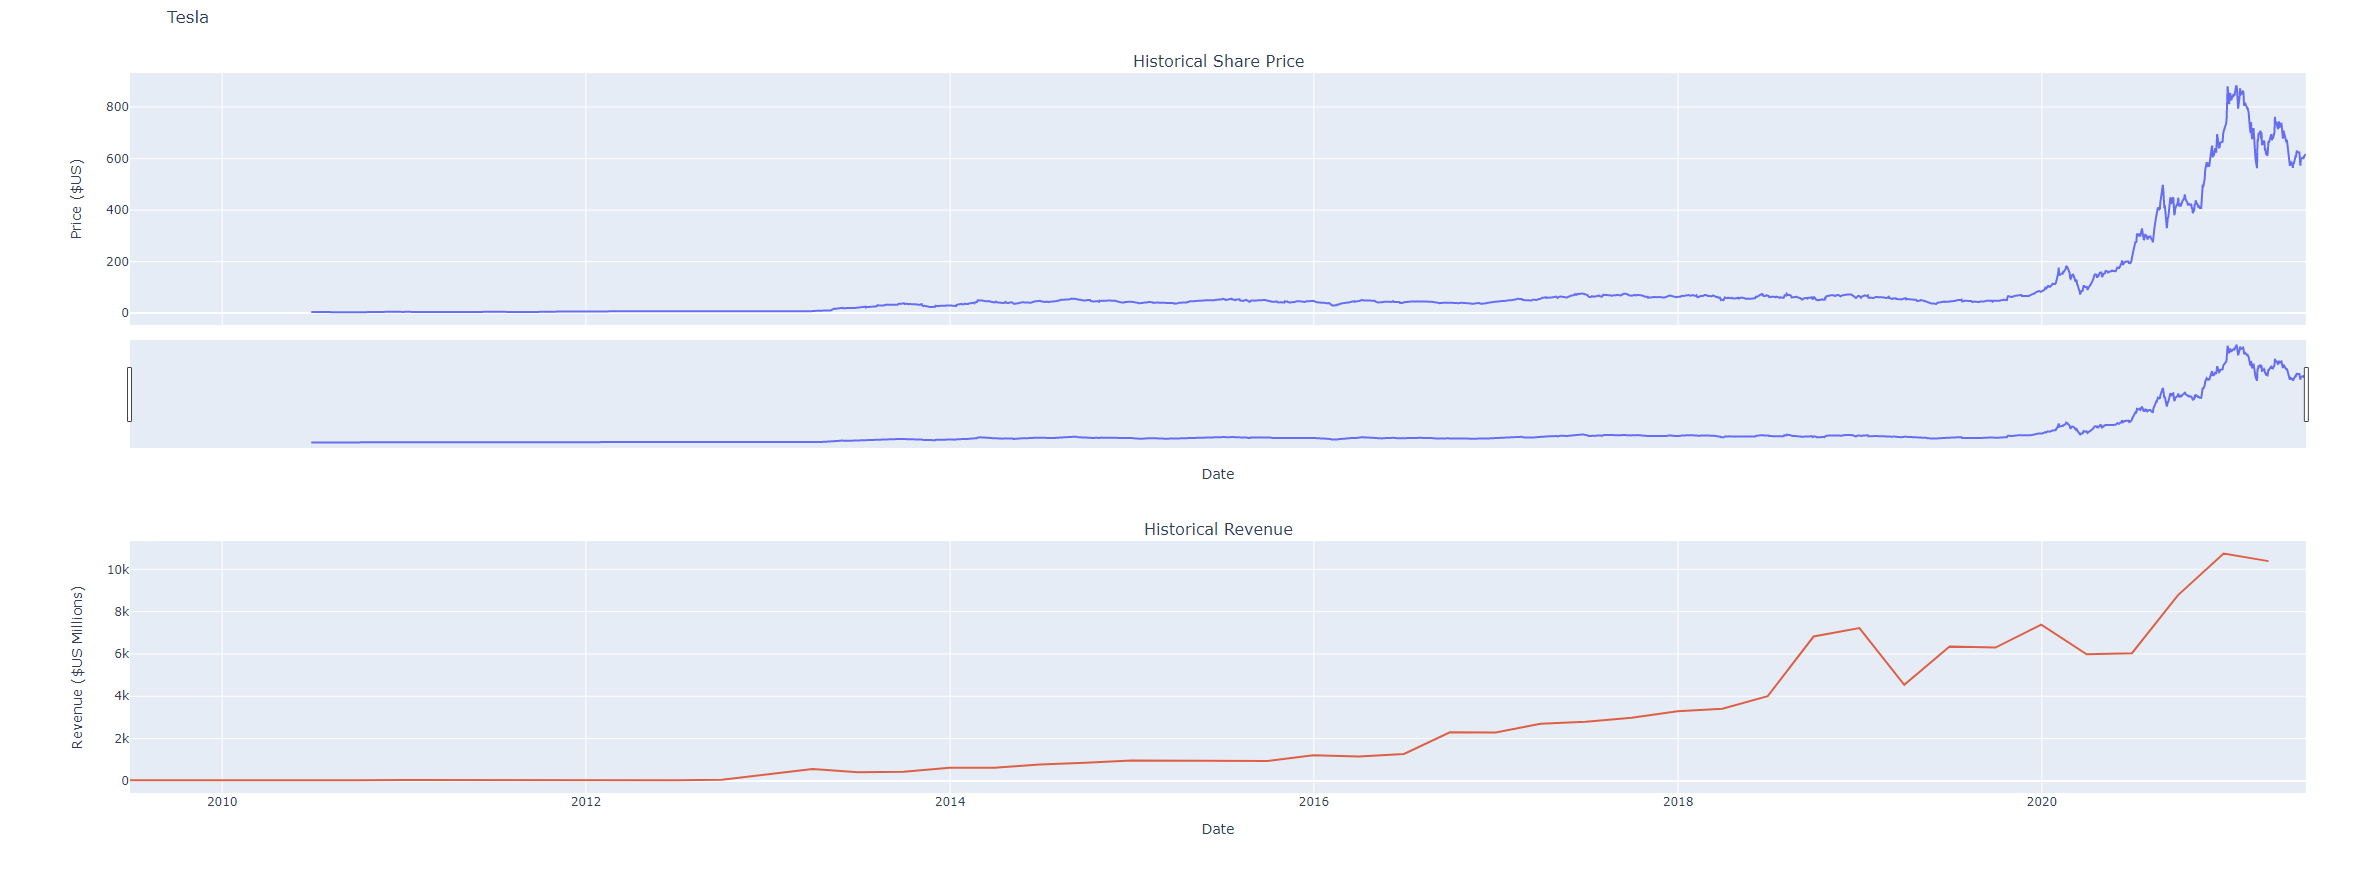

## Plotting GameStop Stock Graph


Using the `make_graph` function to graph the GameStop Stock Data. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop').


In [32]:
make_graph(gme_data, gme_revenue, 'GameStop')

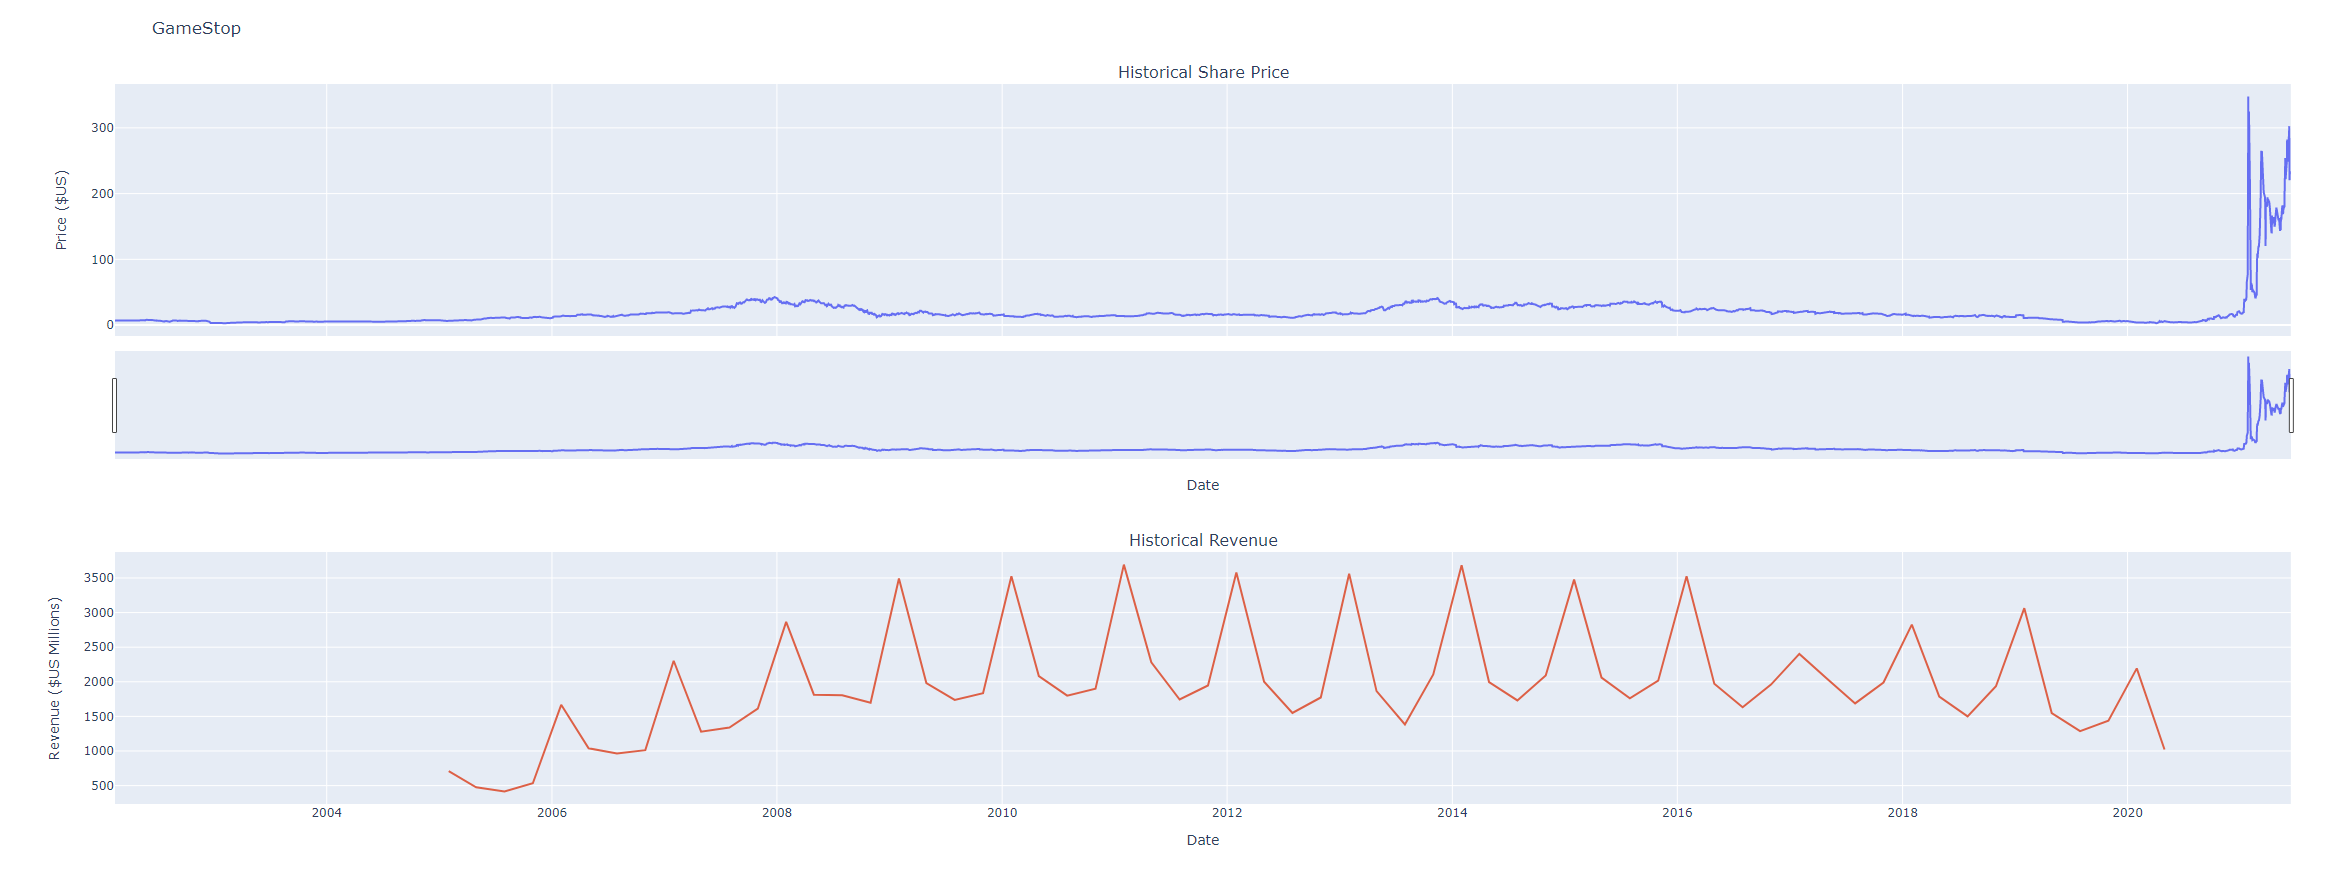

<center><h2>Made by Arvish Pandey</h2></center>